In [1]:
import matplotlib.pyplot as plt 
import tensorflow as tf 
import pandas as pd 
import numpy as np 

import warnings 
warnings.filterwarnings('ignore') 

from tensorflow import keras 
from keras import layers 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.utils import image_dataset_from_directory 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img 
from tensorflow.keras.preprocessing import image_dataset_from_directory 

import os 
import matplotlib.image as mpimg


In [3]:
from zipfile import ZipFile 

data_path = "C:/Users/manoj/Downloads/test_set.zip"

with ZipFile(data_path, 'r') as zip: 
	zip.extractall() 
	print('The data set has been extracted.') 


The data set has been extracted.


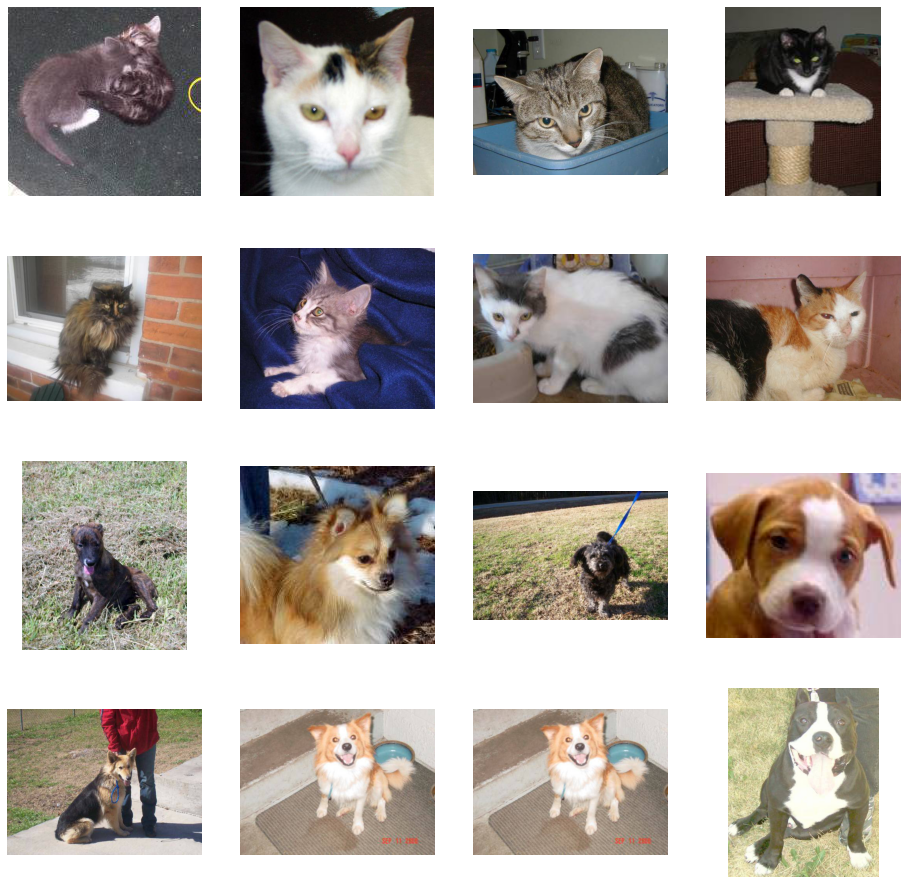

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

fig = plt.gcf() 
fig.set_size_inches(16, 16) 

cat_dir = os.path.join("C:/Users/manoj/Downloads/test_set/test_set/cats") 
dog_dir = os.path.join("C:/Users/manoj/Downloads/test_set/test_set/dogs") 
cat_names = os.listdir(cat_dir) 
dog_names = os.listdir(dog_dir) 

pic_index = 210

cat_images = [os.path.join(cat_dir, fname) 
            for fname in cat_names[pic_index-8:pic_index]] 
dog_images = [os.path.join(dog_dir, fname) 
            for fname in dog_names[pic_index-8:pic_index]] 

for i, img_path in enumerate(cat_images + dog_images): 
    sp = plt.subplot(4, 4, i+1) 
    sp.axis('Off') 

    img = mpimg.imread(img_path) 
    plt.imshow(img) 

plt.show()



In [9]:
base_dir = "C:/Users/manoj/Downloads/test_set/test_set"

# Create datasets 
train_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='training', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 32) 
test_datagen = image_dataset_from_directory(base_dir, 
												image_size=(200,200), 
												subset='validation', 
												seed = 1, 
												validation_split=0.1, 
												batch_size= 32)


Found 2023 files belonging to 2 classes.
Using 1821 files for training.
Found 2023 files belonging to 2 classes.
Using 202 files for validation.


In [10]:
model = tf.keras.models.Sequential([ 
	layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 
	layers.Conv2D(64, (3, 3), activation='relu'), 
	layers.MaxPooling2D(2, 2), 

	layers.Flatten(), 
	layers.Dense(512, activation='relu'), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.1), 
	layers.BatchNormalization(), 
	layers.Dense(512, activation='relu'), 
	layers.Dropout(0.2), 
	layers.BatchNormalization(), 
	layers.Dense(1, activation='sigmoid') 
]) 


In [11]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 64)       0

In [19]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
keras.utils.plot_model( 
	model, 
	show_shapes=True, 
	show_dtype=True, 
	show_layer_activations=True
) 



You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [23]:
history = model.fit(train_datagen, 
		epochs=10, 
		validation_data=test_datagen) 


Epoch 1/10
57/57 [==============================] - 70s 1s/step - loss: 0.8812 - accuracy: 0.5255 - val_loss: 1.5600 - val_accuracy: 0.4554
Epoch 2/10
57/57 [==============================] - 69s 1s/step - loss: 0.7297 - accuracy: 0.5936 - val_loss: 1.1050 - val_accuracy: 0.5594
Epoch 3/10
57/57 [==============================] - 70s 1s/step - loss: 0.6867 - accuracy: 0.6244 - val_loss: 1.0622 - val_accuracy: 0.5050
Epoch 4/10
57/57 [==============================] - 73s 1s/step - loss: 0.6096 - accuracy: 0.6815 - val_loss: 0.8569 - val_accuracy: 0.5594
Epoch 5/10
57/57 [==============================] - 401s 7s/step - loss: 0.6146 - accuracy: 0.6771 - val_loss: 0.7651 - val_accuracy: 0.5396
Epoch 6/10
57/57 [==============================] - 87s 2s/step - loss: 0.5547 - accuracy: 0.7320 - val_loss: 0.6727 - val_accuracy: 0.6386
Epoch 7/10
57/57 [==============================] - 86s 2s/step - loss: 0.5127 - accuracy: 0.7457 - val_loss: 1.0009 - val_accuracy: 0.5297
Epoch 8/10
57/57 [=

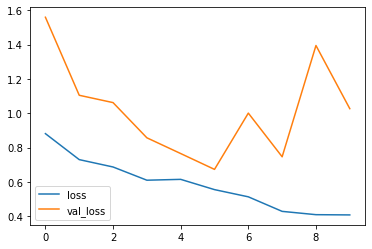

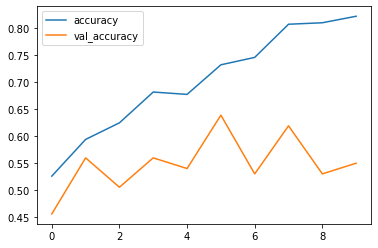

In [25]:
history_df = pd.DataFrame(history.history) 
history_df.loc[:, ['loss', 'val_loss']].plot() 
history_df.loc[:, ['accuracy', 'val_accuracy']].plot() 
plt.show() 


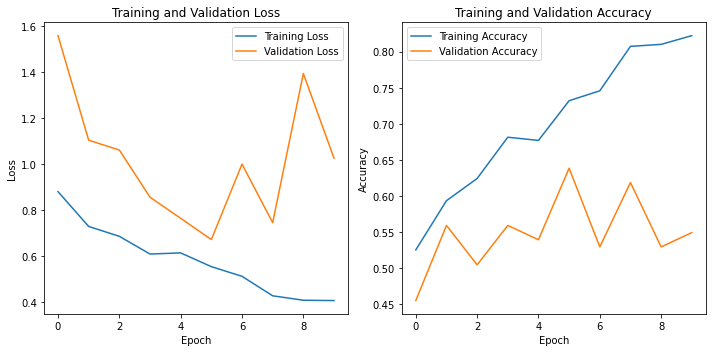

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming history is the variable storing the history object returned by model.fit()

# Create a DataFrame from the history dictionary
history_df = pd.DataFrame(history.history)

# Plot the training and validation loss
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history_df['loss'], label='Training Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(history_df['accuracy'], label='Training Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()



1/1 [==============================] - 0s 172ms/step
Dog


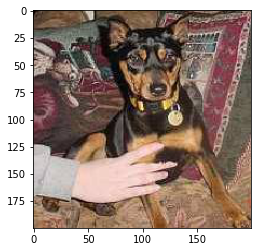

In [36]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Load the image using an absolute file path
image_path = "C:/Users/manoj/Downloads/test_set/test_set/dogs/dog.4964.jpg"
test_image = load_img(image_path, target_size=(200, 200))

# Display the image
plt.imshow(test_image)

# Convert the image to an array
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the prediction result
result = model.predict(test_image)

# Display the prediction result
if result >= 0.5:
    print("Dog")
else:
    print("Cat")


    






1/1 [==============================] - 0s 24ms/step
Cat


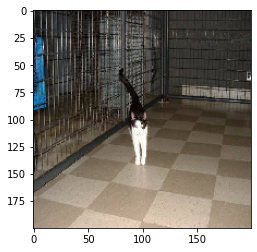

In [39]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
import numpy as np

# Load the image using an absolute file path
image_path = "C:/Users/manoj/Downloads/test_set/test_set/cats/cat.4986.jpg"
test_image = load_img(image_path, target_size=(200, 200))

# Display the image
plt.imshow(test_image)

# Convert the image to an array
test_image = img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

# Get the prediction result
result = model.predict(test_image)

# Display the prediction result
if result >= 0.5:
    print("Dog")
else:
    print("Cat")


In [ ]:
C:\Users\manoj\AppData\Local\Temp\5a176f45-2a8e-4b97-b081-88bba205c522_test_set.zip.522\test_set\cats\cat.4001.jpg